In [1]:
import pandas as pd
import seaborn as sns
from itertools import chain
import numpy as np
import matplotlib.pyplot as plt

In [2]:
sns.set(style="whitegrid")

df = pd.read_csv('./dados/normalizado.csv')

In [3]:
def ordenar(itens, ordem):
    ordenado = list(sorted(zip(ordem, itens), reverse=True))
    itens = [d[1] for d in ordenado]
    ordem = [d[0] for d in ordenado]
    return (itens, ordem)

def contar_unicos(lista):
    (itens, quantidades) = np.unique(lista, return_counts=True)
    return ordenar(itens, quantidades)

def agrupar_outros(itens, quantidades, f=lambda c: c > 1):
    _itens = []
    _quantidades = []
    for (item, quantidade) in zip(itens, quantidades):
        if f(quantidade):
            _itens.append(item)
            _quantidades.append(quantidade)
    
    if len(itens) != len(_itens):
        _quantidades.append(len(itens) - len(_itens))
        _itens.append('Outros')
        
    return (_itens, _quantidades)

def imprimir_tabulacao(respostas, quantidades):
    tamanho_coluna = max([len(s) for s in respostas]) + 5
    pad = ' ' * (tamanho_coluna - 8)
    row = f'| RESPOSTA{pad}| QUANTIDADE |'
    print(row)
    print('=' * len(row))
    for (r, q) in zip(respostas, quantidades):
        pad_r = ' ' * (tamanho_coluna - len(r))
        pad_q = ' ' * (11 - len(str(q)))
        row = f'| {r}{pad_r}|{pad_q}{q} |'
        print(row)
        print('-' * len(row))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text yticklabel objects>)

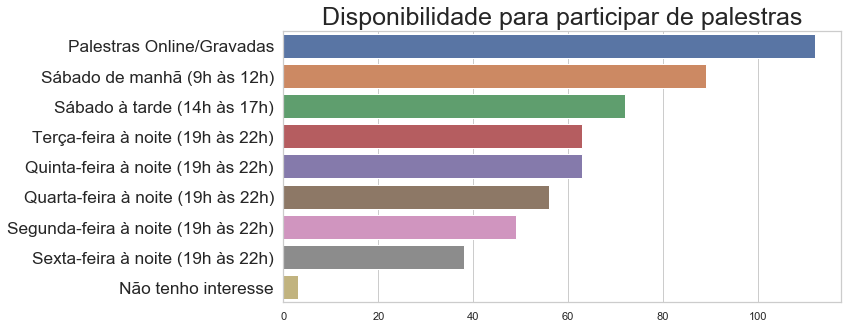

In [4]:
disponibilidade = (s.split(',') for s in df.disponibilidade)
disponibilidade = chain.from_iterable(disponibilidade)
disponibilidade = [s.strip() for s in disponibilidade]

(disponibilidades, quantidades) = contar_unicos(disponibilidade)

(f, ax) = plt.subplots(figsize=(10, 5))
sns.barplot(x=quantidades, y=disponibilidades)
ax.set_title('Disponibilidade para participar de palestras', fontsize=25)
plt.yticks(fontsize='x-large')

In [5]:
imprimir_tabulacao(disponibilidades, quantidades)

| RESPOSTA                               | QUANTIDADE |
| Palestras Online/Gravadas              |        112 |
-------------------------------------------------------
| Sábado de manhã (9h às 12h)            |         89 |
-------------------------------------------------------
| Sábado à tarde (14h às 17h)            |         72 |
-------------------------------------------------------
| Terça-feira à noite (19h às 22h)       |         63 |
-------------------------------------------------------
| Quinta-feira à noite (19h às 22h)      |         63 |
-------------------------------------------------------
| Quarta-feira à noite (19h às 22h)      |         56 |
-------------------------------------------------------
| Segunda-feira à noite (19h às 22h)     |         49 |
-------------------------------------------------------
| Sexta-feira à noite (19h às 22h)       |         38 |
-------------------------------------------------------
| Não tenho interesse                    |      

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text yticklabel objects>)

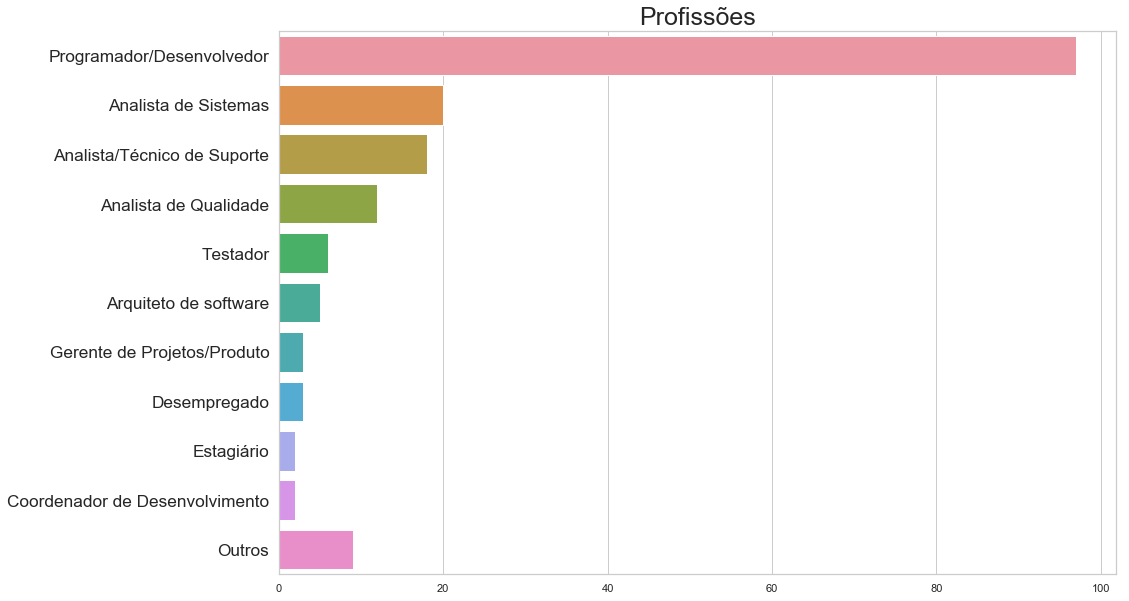

In [6]:
(profissoes, quantidades) = contar_unicos(df['profissão'])
(_profissoes, _quantidades) = agrupar_outros(profissoes, quantidades)

(f, ax) = plt.subplots(figsize=(15, 10))
sns.barplot(x=_quantidades, y=_profissoes)
ax.set_title('Profissões', fontsize=25)
plt.yticks(fontsize='x-large')

In [7]:
imprimir_tabulacao(profissoes, quantidades)

| RESPOSTA                           | QUANTIDADE |
| Programador/Desenvolvedor          |         97 |
---------------------------------------------------
| Analista de Sistemas               |         20 |
---------------------------------------------------
| Analista/Técnico de Suporte        |         18 |
---------------------------------------------------
| Analista de Qualidade              |         12 |
---------------------------------------------------
| Testador                           |          6 |
---------------------------------------------------
| Arquiteto de software              |          5 |
---------------------------------------------------
| Gerente de Projetos/Produto        |          3 |
---------------------------------------------------
| Desempregado                       |          3 |
---------------------------------------------------
| Estagiário                         |          2 |
---------------------------------------------------
| Coordenado

Total 19-35: 89.27%


(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

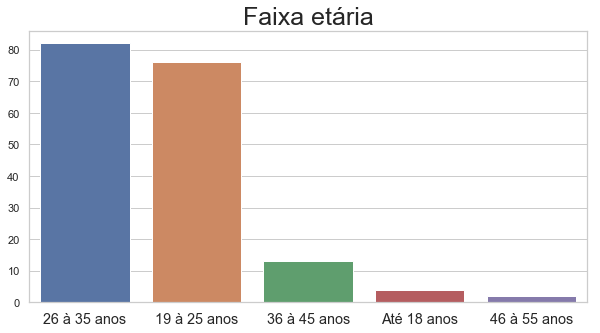

In [8]:
(faixas, quantidades) = contar_unicos(df['faixa etária'])

percentuais = np.array(quantidades) / len(df)
percentual = round(sum(percentuais[:2]) * 100, 2)
print(f'Total 19-35: {percentual}%')

(f, ax) = plt.subplots(figsize=(10, 5))
a = sns.barplot(x=faixas, y=quantidades)
ax.set_title('Faixa etária', fontsize=25)
plt.xticks(fontsize='large')

In [9]:
imprimir_tabulacao(faixas, quantidades)

| RESPOSTA         | QUANTIDADE |
| 26 à 35 anos     |         82 |
---------------------------------
| 19 à 25 anos     |         76 |
---------------------------------
| 36 à 45 anos     |         13 |
---------------------------------
| Até 18 anos      |          4 |
---------------------------------
| 46 à 55 anos     |          2 |
---------------------------------


(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

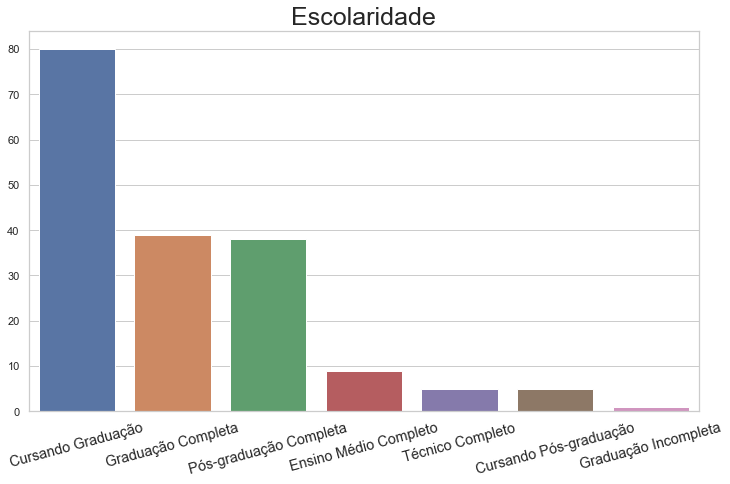

In [10]:
(escolaridades, quantidades) = contar_unicos(df['escolaridade'])

(f, ax) = plt.subplots(figsize=(12, 7))
a = sns.barplot(x=escolaridades, y=quantidades)
ax.set_title('Escolaridade', fontsize=25)
ax.set_xticklabels(ax.get_xticklabels(), rotation=15)
plt.xticks(fontsize='large')

In [11]:
imprimir_tabulacao(escolaridades, quantidades)

| RESPOSTA                   | QUANTIDADE |
| Cursando Graduação         |         80 |
-------------------------------------------
| Graduação Completa         |         39 |
-------------------------------------------
| Pós-graduação Completa     |         38 |
-------------------------------------------
| Ensino Médio Completo      |          9 |
-------------------------------------------
| Técnico Completo           |          5 |
-------------------------------------------
| Cursando Pós-graduação     |          5 |
-------------------------------------------
| Graduação Incompleta       |          1 |
-------------------------------------------


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text yticklabel objects>)

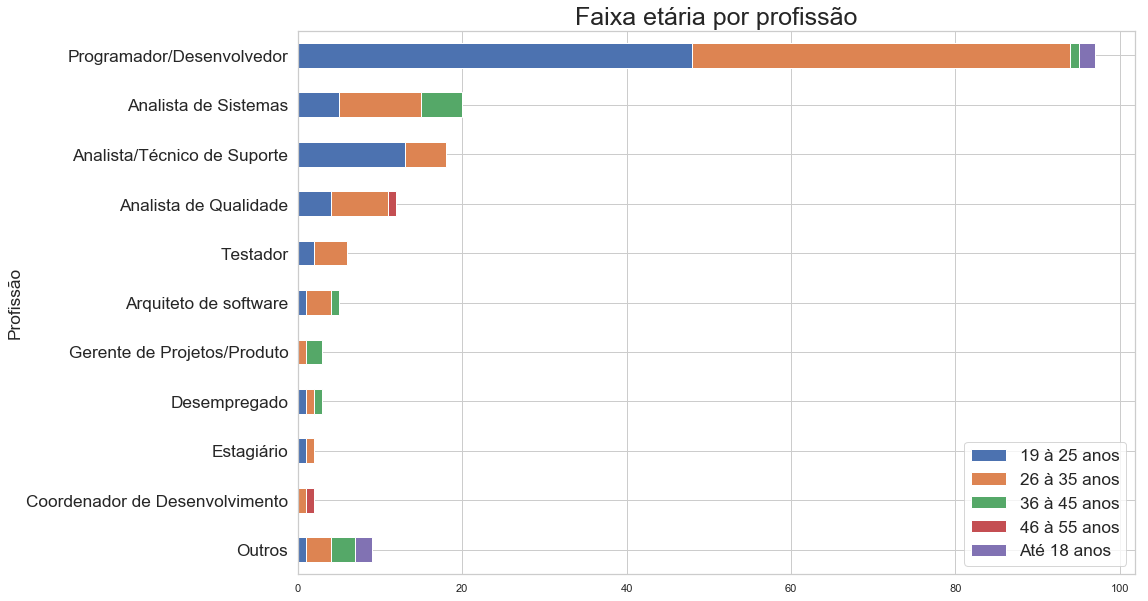

In [12]:
(f, ax) = plt.subplots(figsize=(15, 10))
(profissoes, quantidades) = contar_unicos(df['profissão'])
(profissoes, quantidades) = agrupar_outros(profissoes, quantidades)
df2 = df.copy()
df2.loc[~df2['profissão'].isin(profissoes), 'profissão'] = 'Outros'
df2 = df2.groupby(['profissão', 'faixa etária']).size().unstack().fillna(0)
df2['temp_ordenacao'] = df2.sum(axis=1)
df2.loc[df2.index == 'Outros', 'temp_ordenacao'] = 0
df2 = df2.sort_values('temp_ordenacao').drop(columns=['temp_ordenacao'])
df2.plot.barh(stacked=True, ax=ax)
ax.set_title('Faixa etária por profissão', fontsize=25)
ax.set_ylabel('Profissão', fontsize='x-large')
plt.legend(fontsize='x-large')
plt.yticks(fontsize='x-large')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text yticklabel objects>)

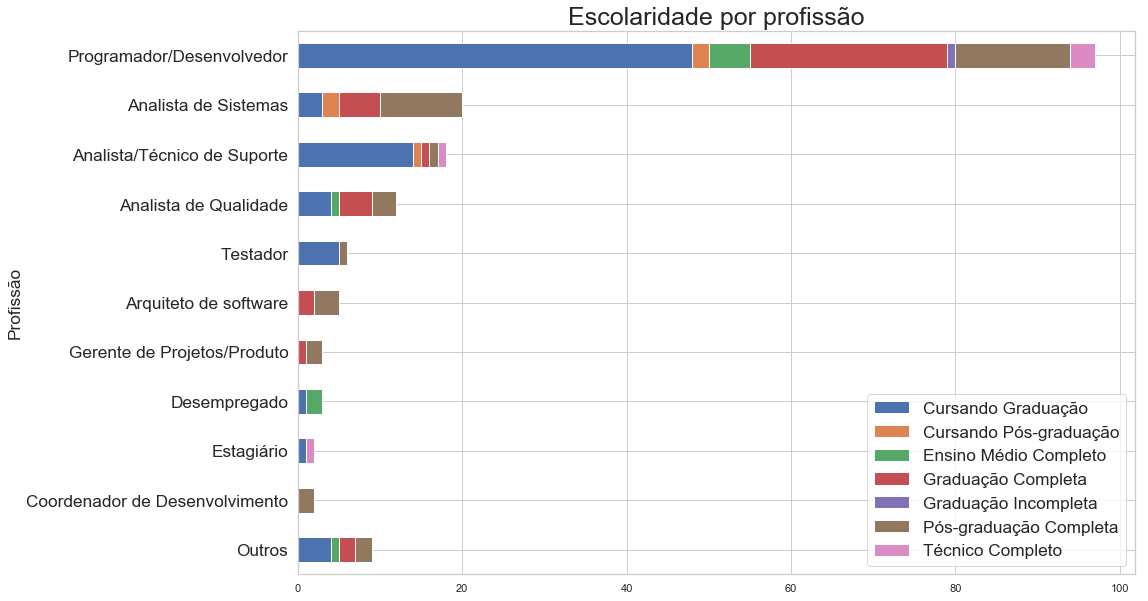

In [13]:
(f, ax) = plt.subplots(figsize=(15, 10))
(profissoes, quantidades) = contar_unicos(df['profissão'])
(profissoes, quantidades) = agrupar_outros(profissoes, quantidades)
df2 = df.copy()
df2.loc[~df2['profissão'].isin(profissoes), 'profissão'] = 'Outros'
df2 = df2.groupby(['profissão', 'escolaridade']).size().unstack().fillna(0)
df2['temp_ordenacao'] = df2.sum(axis=1)
df2.loc[df2.index == 'Outros', 'temp_ordenacao'] = 0
df2 = df2.sort_values('temp_ordenacao').drop(columns=['temp_ordenacao'])
df2.plot.barh(stacked=True, ax=ax)
ax.set_title('Escolaridade por profissão', fontsize=25)
ax.set_ylabel('Profissão', fontsize='x-large')
plt.legend(fontsize='x-large')
plt.yticks(fontsize='x-large')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]),
 <a list of 28 Text yticklabel objects>)

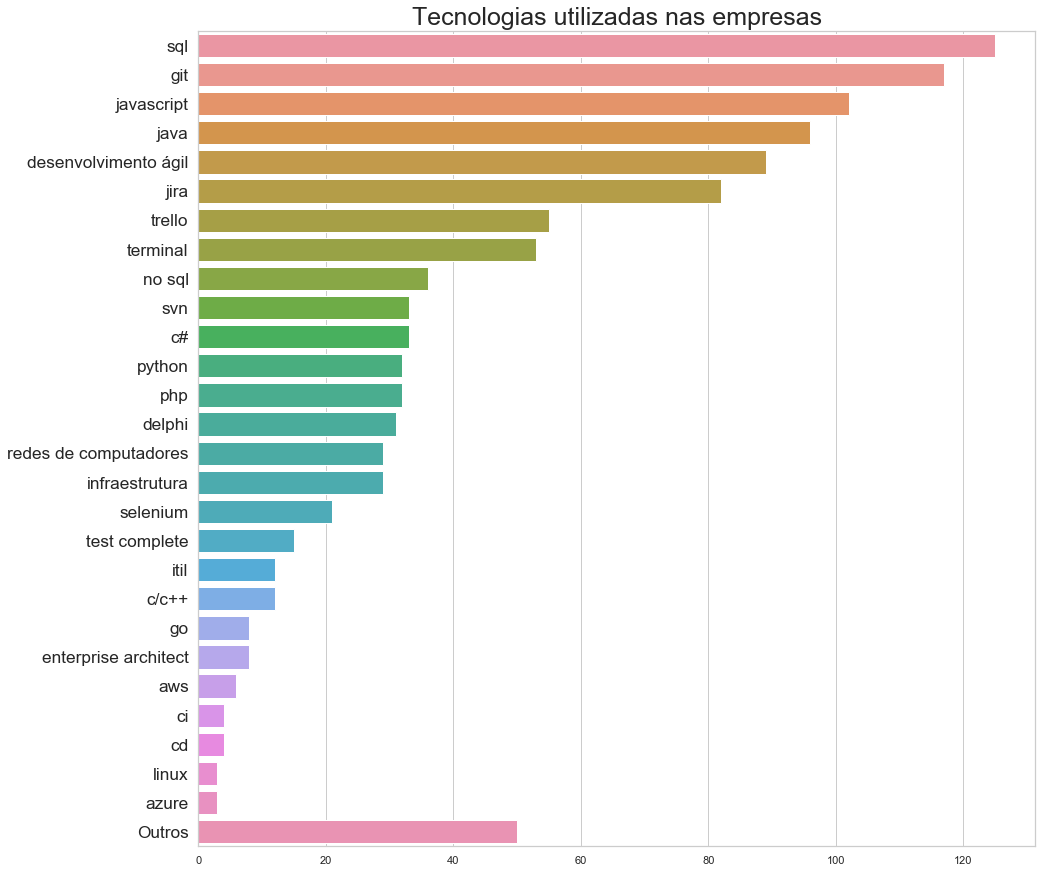

In [14]:
tecnologias = (s.split(';') for s in df.empresa.fillna(''))
tecnologias = chain.from_iterable(tecnologias)
tecnologias = [s.strip() for s in tecnologias if s.strip()]

(tecnologias, quantidades) = contar_unicos(tecnologias)
(_tecnologias, _quantidades) = agrupar_outros(tecnologias, quantidades, f=lambda c: c > 2)

(f, ax) = plt.subplots(figsize=(15, 15))
sns.barplot(x=_quantidades, y=_tecnologias)
ax.set_title('Tecnologias utilizadas nas empresas', fontsize=25)
plt.yticks(fontsize='x-large')

In [15]:
imprimir_tabulacao(tecnologias, quantidades)

| RESPOSTA                               | QUANTIDADE |
| sql                                    |        125 |
-------------------------------------------------------
| git                                    |        117 |
-------------------------------------------------------
| javascript                             |        102 |
-------------------------------------------------------
| java                                   |         96 |
-------------------------------------------------------
| desenvolvimento ágil                   |         89 |
-------------------------------------------------------
| jira                                   |         82 |
-------------------------------------------------------
| trello                                 |         55 |
-------------------------------------------------------
| terminal                               |         53 |
-------------------------------------------------------
| no sql                                 |      

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35]), <a list of 36 Text yticklabel objects>)

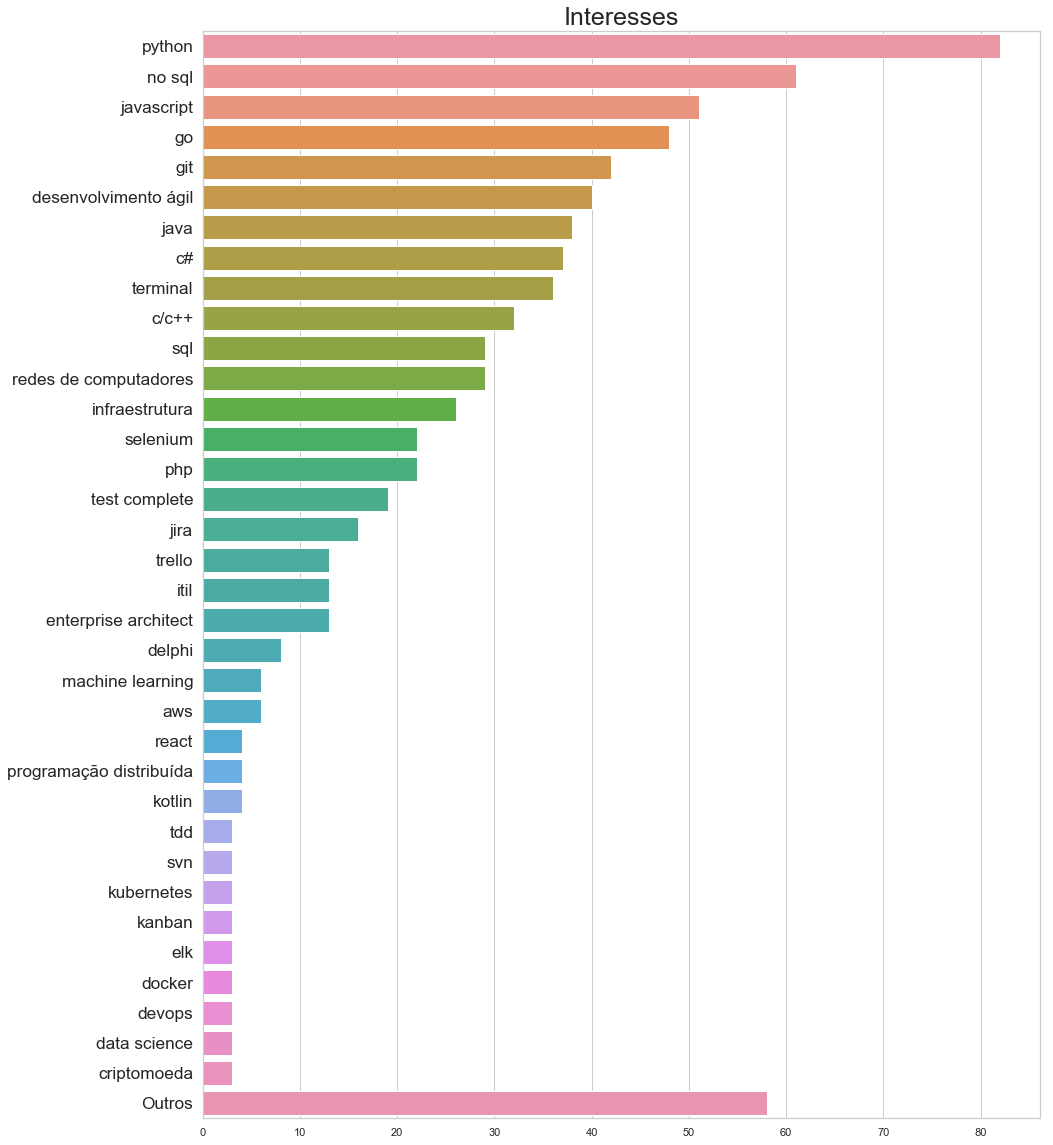

In [16]:
tecnologias = (s.split(';') for s in df.interesse.fillna(''))
tecnologias = chain.from_iterable(tecnologias)
tecnologias = [s.strip() for s in tecnologias if s.strip()]

(tecnologias, quantidades) = contar_unicos(tecnologias)
(_tecnologias, _quantidades) = agrupar_outros(tecnologias, quantidades, f=lambda c: c > 2)

(f, ax) = plt.subplots(figsize=(15, 20))
sns.barplot(x=_quantidades, y=_tecnologias)
ax.set_title('Interesses', fontsize=25)
plt.yticks(fontsize='x-large')

In [17]:
imprimir_tabulacao(tecnologias, quantidades)

| RESPOSTA                                | QUANTIDADE |
| python                                  |         82 |
--------------------------------------------------------
| no sql                                  |         61 |
--------------------------------------------------------
| javascript                              |         51 |
--------------------------------------------------------
| go                                      |         48 |
--------------------------------------------------------
| git                                     |         42 |
--------------------------------------------------------
| desenvolvimento ágil                    |         40 |
--------------------------------------------------------
| java                                    |         38 |
--------------------------------------------------------
| c#                                      |         37 |
--------------------------------------------------------
| terminal                     

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]),
 <a list of 28 Text yticklabel objects>)

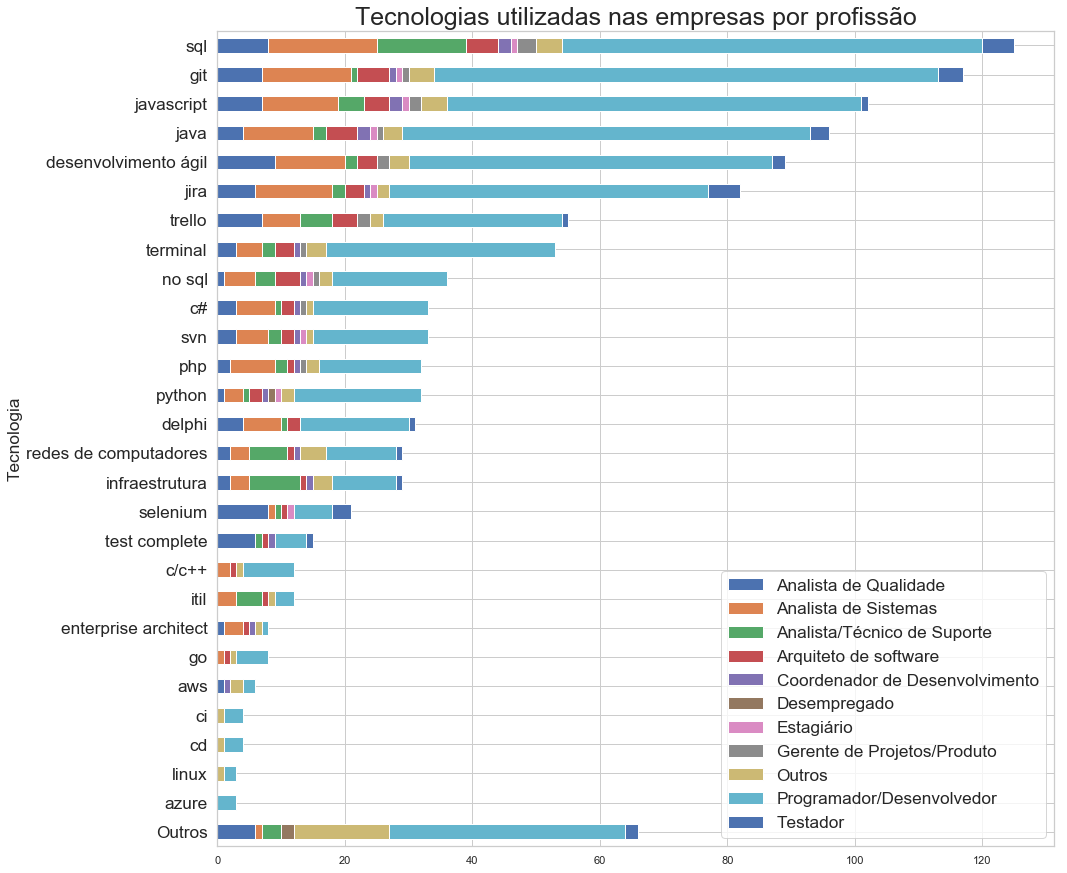

In [18]:
tecnologias = (s.split(';') for s in df.empresa.fillna(''))
tecnologias = chain.from_iterable(tecnologias)
tecnologias = [s.strip() for s in tecnologias if s.strip()]

(tecnologias, quantidades) = contar_unicos(tecnologias)
(tecnologias, quantidades) = agrupar_outros(tecnologias, quantidades, f=lambda c: c > 2)

(profissoes, quantidades) = contar_unicos(df['profissão'])
(profissoes, quantidades) = agrupar_outros(profissoes, quantidades)

def pares_profissao_tecnologias(df, profissoes, tecnologias):
    for row in df.itertuples():
        tecnologia = row.empresa or ''
        for tecnologia in tecnologia.split(';'):
            tecnologia = tecnologia if tecnologia in tecnologias else 'Outros'
            profissao = row.profissão
            profissao = profissao if profissao in profissoes else 'Outros'
            yield (profissao.strip(), tecnologia.strip())

df.empresa = df.empresa.fillna('')
profissoes_tecnologias = pares_profissao_tecnologias(df, profissoes, tecnologias)

df2 = pd.DataFrame(data=profissoes_tecnologias, columns=['profissão', 'tecnologia'])
df2 = df2.groupby(by=['tecnologia', 'profissão']).size().unstack().fillna(0)
df2['temp_ordenacao'] = df2.sum(axis=1)
df2.loc[df2.index == 'Outros', 'temp_ordenacao'] = 0
df2 = df2.sort_values('temp_ordenacao').drop(columns=['temp_ordenacao'])
(f, ax) = plt.subplots(figsize=(15, 15))
df2.plot.barh(stacked=True, ax=ax)
ax.set_title('Tecnologias utilizadas nas empresas por profissão', fontsize=25)
ax.set_ylabel('Tecnologia', fontsize='x-large')
plt.legend(fontsize='x-large')
plt.yticks(fontsize='x-large')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35]), <a list of 36 Text yticklabel objects>)

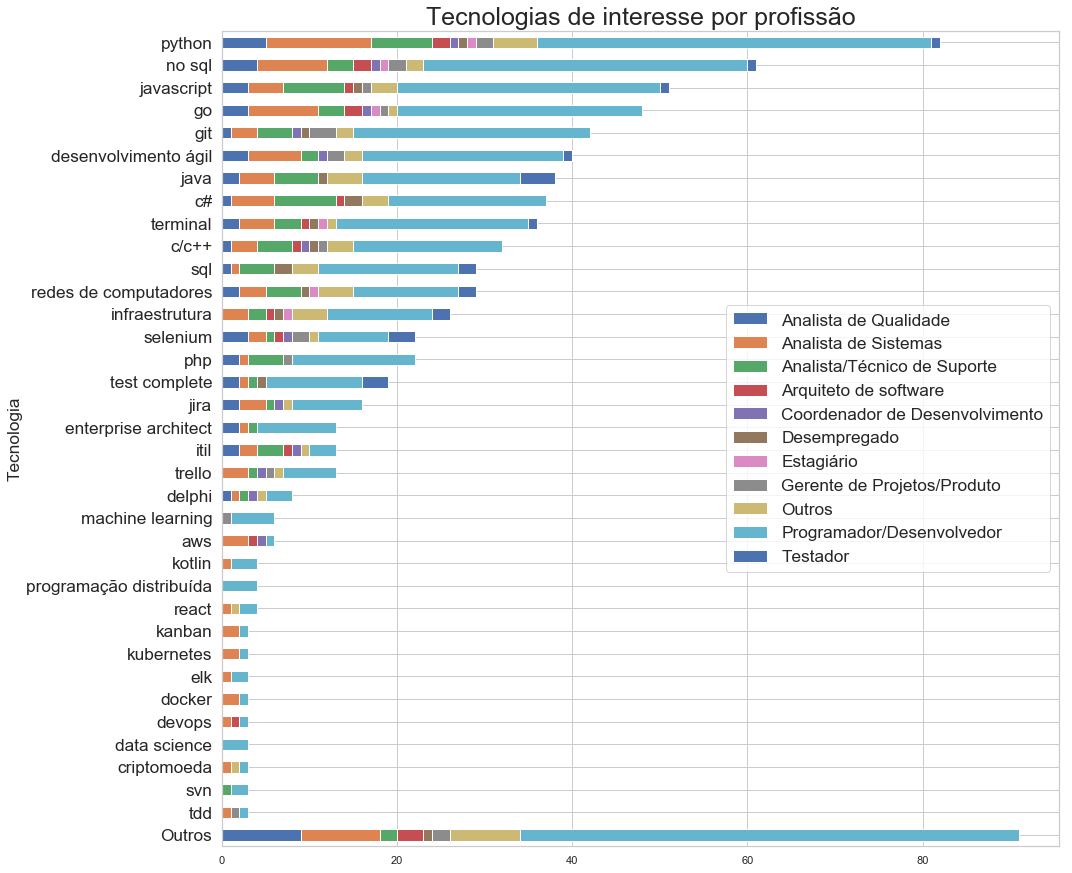

In [19]:
tecnologias = (s.split(';') for s in df.interesse.fillna(''))
tecnologias = chain.from_iterable(tecnologias)
tecnologias = [s.strip() for s in tecnologias if s.strip()]

(tecnologias, quantidades) = contar_unicos(tecnologias)
(tecnologias, quantidades) = agrupar_outros(tecnologias, quantidades, f=lambda c: c > 2)

(profissoes, quantidades) = contar_unicos(df['profissão'])
(profissoes, quantidades) = agrupar_outros(profissoes, quantidades)

def pares_profissao_tecnologias(df, profissoes, tecnologias):
    for row in df.itertuples():
        tecnologia = row.interesse or ''
        for tecnologia in tecnologia.split(';'):
            tecnologia = tecnologia if tecnologia in tecnologias else 'Outros'
            profissao = row.profissão
            profissao = profissao if profissao in profissoes else 'Outros'
            yield (profissao.strip(), tecnologia.strip())

df.interesse = df.interesse.fillna('')
profissoes_tecnologias = pares_profissao_tecnologias(df, profissoes, tecnologias)

df2 = pd.DataFrame(data=profissoes_tecnologias, columns=['profissão', 'tecnologia'])
df2 = df2.groupby(by=['tecnologia', 'profissão']).size().unstack().fillna(0)
df2['temp_ordenacao'] = df2.sum(axis=1)
df2.loc[df2.index == 'Outros', 'temp_ordenacao'] = 0
df2 = df2.sort_values('temp_ordenacao').drop(columns=['temp_ordenacao'])
(f, ax) = plt.subplots(figsize=(15, 15))
df2.plot.barh(stacked=True, ax=ax)
ax.set_title('Tecnologias de interesse por profissão', fontsize=25)
ax.set_ylabel('Tecnologia', fontsize='x-large')
plt.legend(fontsize='x-large')
plt.yticks(fontsize='x-large')